1.导入 Pandas 库并简写为 pd，并输出版本号

In [1]:
import pandas as pd
print(pd.__version__)

0.24.2


2. 从列表创建 Series

In [2]:
arr = [0, 1, 2, 3, 4]
df = pd.Series(arr) # 如果不指定索引，则默认从 0 开始
df

0    0
1    1
2    2
3    3
4    4
dtype: int64

3. 从字典创建 Series

In [3]:
d = {'a':1,'b':2,'c':3,'d':4,'e':5} # 键: 值 = 索引: 值
df = pd.Series(d)
df

a    1
b    2
c    3
d    4
e    5
dtype: int64

4. 从 NumPy 数组创建 DataFrame

In [5]:
import numpy as np

dates = pd.date_range('today',periods=6) # 定义时间序列作为 index
num_arr = np.random.randn(6,4) # 传入 numpy 随机数组
columns = ['A','B','C','D'] # 将列表作为列名
df = pd.DataFrame(num_arr, index = dates, columns = columns)
df

,A,B,C,D
2020-01-26 22:35:00.147036,2.330235,-1.529096,1.629470,1.295293
2020-01-27 22:35:00.147036,0.016252,1.025475,0.360535,-0.730838
2020-01-28 22:35:00.147036,-0.212791,-1.696814,0.190254,-0.175007
2020-01-29 22:35:00.147036,-1.426057,0.367161,1.311689,0.391484
2020-01-30 22:35:00.147036,-0.485466,1.526757,1.189427,-0.285282
2020-01-31 22:35:00.147036,0.589395,0.682697,0.865789,2.161392


5. 从CSV中创建 DataFrame，分隔符为“；”，编码格式为gbk

In [ ]:
# data = pd.read_csv('test.csv', sep = ';', encoding = 'gbk')

6.从字典对象data创建DataFrame，设置索引为labels

In [6]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


7. 显示df的基础信息，包括行的数量；列名；每一列值的数量、类型

In [7]:
df.info()

# 方法二
# df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


8.展示df的前3行

In [9]:
df[:3]
# 方法二
#df.iloc[:3]
# 方法三
#df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


9.取出df的animal和age列

In [10]:
df.loc[:, ['animal', 'age']]
# 方法二
# df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


10.取出索引为[3, 4, 8]行的animal和age列

In [13]:
df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


11.取出age值大于3的行

In [14]:
df[df['age'] > 3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


12.取出age值缺失的行

In [15]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


13.取出age在2,4间的行（不含）

In [18]:
df[(df['age']>2) & (df['age']<4)]
# 方法二
#df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
j,dog,3.0,1,no


14.f行的age改为1.5

In [19]:
df.loc['f', 'age'] = 1.5

15.计算visits的总和

In [20]:
df['visits'].sum()

19

16.计算每个不同种类animal的age的平均数

In [21]:
df.groupby('animal')['age'].mean()

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

17.在df中插入新行k，然后删除该行

In [22]:
#插入
df.loc['k'] = [5.5, 'dog', 'no', 2]
# 删除
df = df.drop('k')
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7,2,no
j,dog,3,1,no


18.计算df中每个种类animal的数量

In [23]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

19.先按age降序排列，后按visits升序排列

In [24]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7,2,no
e,dog,5,2,no
g,snake,4.5,1,no
j,dog,3,1,no
b,cat,3,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


20.将priority列中的yes, no替换为布尔值True, False

In [25]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


21.将animal列中的snake替换为python

In [26]:
df['animal'] = df['animal'].replace('snake', 'python')
df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7,2,False
j,dog,3,1,False


22.对每种animal的每种不同数量visits，计算平均age，即，返回一个表格，行是aniaml种类，列是visits数量，表格值是行动物种类列访客数量的平均年龄

In [46]:
df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

DataError: No numeric types to aggregate

# 进阶操作

23.有一列整数列A的DatraFrame，删除数值重复的行

In [48]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
print(df)

# 方法一
df1 = df.loc[df['A'].shift() != df['A']]
print(df1)

# 方法二
df2 = df.drop_duplicates(subset='A')
print(df2)

    A
0   1
1   2
2   2
3   3
4   4
5   5
6   5
7   5
8   6
9   7
10  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7
   A
0  1
1  2
3  3
4  4
5  5
8  6
9  7


24.一个全数值DatraFrame，每个数字减去该行的平均数

In [49]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df1 = df.sub(df.mean(axis=1), axis=0)
print(df1)

          0         1         2
0  0.874722  0.849300  0.979129
1  0.632453  0.491695  0.486075
2  0.278710  0.079340  0.502684
3  0.935940  0.695121  0.337685
4  0.065386  0.017760  0.987306
          0         1         2
0 -0.026328 -0.051751  0.078079
1  0.095712 -0.045046 -0.050666
2 -0.008202 -0.207571  0.215773
3  0.279691  0.038873 -0.318563
4 -0.291431 -0.339057  0.630489


25.一个有5列的DataFrame，求哪一列的和最小

In [51]:
df = pd.DataFrame(np.random.random(size=(5, 5)), columns=list('abcde'))
print(df)
df.sum().idxmin()

          a         b         c         d         e
0  0.154787  0.798110  0.389713  0.494854  0.025961
1  0.955104  0.680966  0.393275  0.598947  0.082979
2  0.219080  0.160648  0.922459  0.607918  0.706043
3  0.127535  0.560959  0.033012  0.358390  0.809799
4  0.885998  0.389379  0.579955  0.940825  0.494397


'e'

26.给定DataFrame，求A列每个值的前3大的B的和

In [52]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df)
df1 = df.groupby('A')['B'].nlargest(3).sum(level=0)
print(df1)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87
A
a    409
b    156
c    345
Name: B, dtype: int64


27.给定DataFrame，有列A, B，A的值在1-100（含），对A列每10步长，求对应的B的和

In [53]:
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
print(df)
df1 = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()
print(df1)

    A   B
0   1   1
1   2   2
2  11  11
3  11  11
4  33  33
5  34  34
6  35  35
7  40  40
8  79  79
9  99  99
A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64


28.给定DataFrame，计算每个元素至它前面最近的0元素（或者至表格开头）的距离，生成新列y

In [54]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # 标记0的位置
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
print(df)

# 方法二
# x = (df['X'] != 0).cumsum()
# y = x != x.shift()
# df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum()

# 方法三
# df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
#first_zero_idx = (df['X'] == 0).idxmax()
# df['Y'].iloc[0:first_zero_idx] += 1

   X  Y
0  7  1
1  2  2
2  0  0
3  3  1
4  4  2
5  2  3
6  5  4
7  0  0
8  3  1
9  4  2


29.一个全数值的DataFrame，返回最大3值的坐标

In [55]:
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
df.unstack().sort_values()[-3:].index.tolist()

          0         1         2
0  0.560936  0.446771  0.284327
1  0.669337  0.238784  0.926773
2  0.451589  0.466395  0.473179
3  0.212981  0.987594  0.400449
4  0.448357  0.138433  0.585586


[(0, 1), (2, 1), (1, 3)]

30.给定DataFrame，将负值代替为同组的平均值

In [56]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [-12,345,3,1,45,14,4,-52,54,23,-235,21,57,3,87]})
print(df)

def replace(group):
    mask = group < 0
    group[mask] = group[~mask].mean()
    return group

df['vals'] = df.groupby(['grps'])['vals'].transform(replace)
print(df)

   grps  vals
0     a   -12
1     a   345
2     a     3
3     b     1
4     b    45
5     c    14
6     a     4
7     a   -52
8     b    54
9     c    23
10    c  -235
11    c    21
12    b    57
13    b     3
14    c    87
   grps        vals
0     a  117.333333
1     a  345.000000
2     a    3.000000
3     b    1.000000
4     b   45.000000
5     c   14.000000
6     a    4.000000
7     a  117.333333
8     b   54.000000
9     c   23.000000
10    c   36.250000
11    c   21.000000
12    b   57.000000
13    b    3.000000
14    c   87.000000


31.计算3位滑动窗口的平均值，忽略NAN

In [57]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value'] 

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()

s.reset_index(level=0, drop=True).sort_index() 

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

# Series 和 Datetime索引

32.创建Series s，将2015所有工作日作为随机值的索引

In [58]:
dti = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B') 
s = pd.Series(np.random.rand(len(dti)), index=dti)

s.head(10)

2015-01-01    0.466616
2015-01-02    0.524806
2015-01-05    0.225492
2015-01-06    0.581140
2015-01-07    0.158025
2015-01-08    0.200535
2015-01-09    0.148504
2015-01-12    0.670922
2015-01-13    0.313608
2015-01-14    0.088039
Freq: B, dtype: float64

33.所有礼拜三的值求和

In [59]:
s[s.index.weekday == 2].sum() 

25.157627046194005

34.求每个自然月的平均数

In [60]:
s.resample('M').mean()

2015-01-31    0.409307
2015-02-28    0.527204
2015-03-31    0.475999
2015-04-30    0.552173
2015-05-31    0.456232
2015-06-30    0.514022
2015-07-31    0.573917
2015-08-31    0.469586
2015-09-30    0.547024
2015-10-31    0.643884
2015-11-30    0.581536
2015-12-31    0.479662
Freq: M, dtype: float64

35.每连续4个月为一组，求最大值所在的日期

In [61]:
s.groupby(pd.Grouper(freq='4M')).idxmax()

2015-01-31   2015-01-19
2015-05-31   2015-04-24
2015-09-30   2015-06-30
2016-01-31   2015-11-13
Freq: 4M, dtype: datetime64[ns]

36.创建2015-2016每月第三个星期四的序列

In [62]:
pd.date_range('2015-01-01', '2016-12-31', freq='WOM-3THU')

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

# 数据清洗

In [63]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


37.FlightNumber列中有些值缺失了，他们本来应该是每一行增加10，填充缺失的数值，并且令数据类型为整数

In [64]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


38.将From_To列从_分开，分成From, To两列，并删除原始列

In [65]:
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']
df = df.join(temp)
df = df.drop('From_To', axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


39.将From, To大小写统一

In [66]:
df['From'] = df['From'].str.capitalize()
df['To'] = df['To'].str.capitalize()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


40.Airline列，有一些多余的标点符号，需要提取出正确的航司名称。举例：'(British Airways. )' 应该改为 'British Airways'.

In [67]:
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


41.Airline列，数据被以列表的形式录入，但是我们希望每个数字被录入成单独一列，delay_1, delay_2, ...没有的用NAN替代。

In [68]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)

df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


# 层次化索引

42.用 letters = ['A', 'B', 'C'] 和 numbers = list(range(10))的组合作为系列随机值的层次化索引

In [69]:
letters = ['A', 'B', 'C']
numbers = list(range(4))

mi = pd.MultiIndex.from_product([letters, numbers])
s = pd.Series(np.random.rand(12), index=mi)
s

A  0    0.981492
   1    0.264213
   2    0.309720
   3    0.038786
B  0    0.225606
   1    0.662784
   2    0.143166
   3    0.852189
C  0    0.936272
   1    0.614075
   2    0.667985
   3    0.735375
dtype: float64

43.检查s是否是字典顺序排序的

In [70]:
s.index.is_lexsorted()
# 方法二
# s.index.lexsort_depth == s.index.nlevels

True

44.选择二级索引为1, 3的行

In [71]:
s.loc[:, [1, 3]]

A  1    0.264213
   3    0.038786
B  1    0.662784
   3    0.852189
C  1    0.614075
   3    0.735375
dtype: float64

45.对s进行切片操作，取一级索引从头至B，二级索引从2开始到最后

In [72]:
s.loc[pd.IndexSlice[:'B', 2:]]
# 方法二
# s.loc[slice(None, 'B'), slice(2, None)]

A  2    0.309720
   3    0.038786
B  2    0.143166
   3    0.852189
dtype: float64

46.计算每个一级索引的和（A, B, C每一个的和）

In [73]:
s.sum(level=0)
#方法二
#s.unstack().sum(axis=0)

A    1.594212
B    1.883746
C    2.953706
dtype: float64

47.交换索引等级，新的Series是字典顺序吗？不是的话请排序

In [74]:
new_s = s.swaplevel(0, 1)
print(new_s)
print(new_s.index.is_lexsorted())
new_s = new_s.sort_index()
print(new_s)

0  A    0.981492
1  A    0.264213
2  A    0.309720
3  A    0.038786
0  B    0.225606
1  B    0.662784
2  B    0.143166
3  B    0.852189
0  C    0.936272
1  C    0.614075
2  C    0.667985
3  C    0.735375
dtype: float64
False
0  A    0.981492
   B    0.225606
   C    0.936272
1  A    0.264213
   B    0.662784
   C    0.614075
2  A    0.309720
   B    0.143166
   C    0.667985
3  A    0.038786
   B    0.852189
   C    0.735375
dtype: float64


# 可视化

In [75]:
import matplotlib.pyplot as plt
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
plt.style.use('ggplot')

48.画出df的散点图

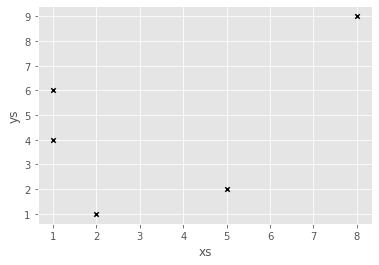

In [76]:
df.plot.scatter("xs", "ys", color = "black", marker = "x")

49.可视化指定4维DataFrame

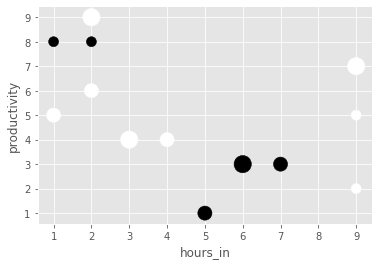

In [77]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 100, c = df.caffienated)

50.在同一个图中可视化2组数据，共用X轴，但y轴不同

(-1, 12)

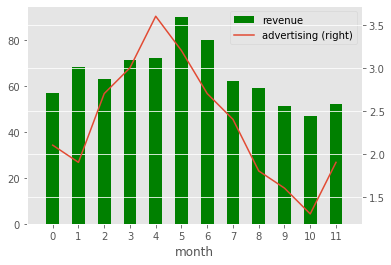

In [78]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)})

ax = df.plot.bar("month", "revenue", color = "green")
df.plot.line("month", "advertising", secondary_y = True, ax = ax)
ax.set_xlim((-1,12))